# Ein Testbild runterladen

In [2]:
import urllib.request
URL = "http://www.juergenbrauer.org/datasets/"
dateiname = "testbild.png"
urllib.request.urlretrieve(URL+dateiname, dateiname)

('testbild.png', <http.client.HTTPMessage at 0x7f3ecd93d460>)

# Testbild einlesen

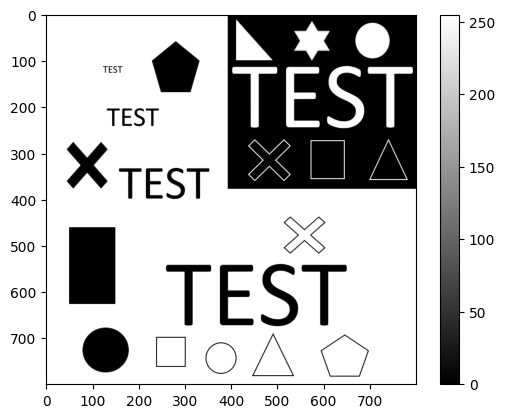

In [30]:
import cv2
img = cv2.imread(dateiname)
gray = img[:,:,0]
gray_float = np.float64(gray)

import matplotlib.pyplot as plt
plt.imshow(gray_float, cmap="gray")
plt.colorbar()
plt.show()

In [14]:
((gray > 0) & (gray < 255)).shape

(800, 800)

In [16]:
sum( ((gray > 0) & (gray < 255)).flatten() )

12953

In [19]:
import numpy as np
_, wie_oft_kommt_was_vor = np.unique(gray, return_counts=True)

In [23]:
sum(wie_oft_kommt_was_vor[1:255])

12953

In [18]:
import numpy as np
np.unique(gray, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

# Das Bild filtern

In [24]:
import numpy as np
kernel = np.array([
                   [-1.0, 0.0, 1.0],
                   [-1.0, 0.0, 1.0],
                   [-1.0, 0.0, 1.0]
                  ])

In [25]:
gray.shape

(800, 800)

In [26]:
kernel.shape

(3, 3)

In [27]:
gray.dtype

dtype('uint8')

In [28]:
kernel.dtype

dtype('float64')

In [29]:
gray_float = np.float64(gray)

In [32]:
M = cv2.filter2D(gray_float, -1, kernel)

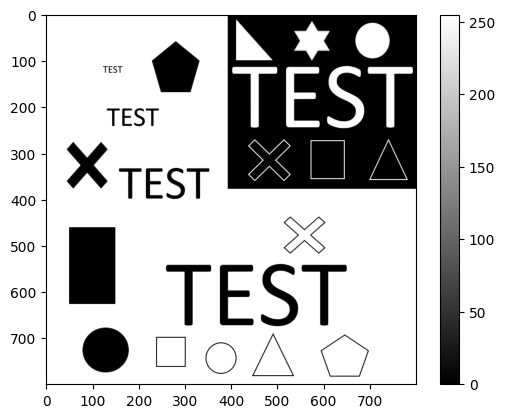

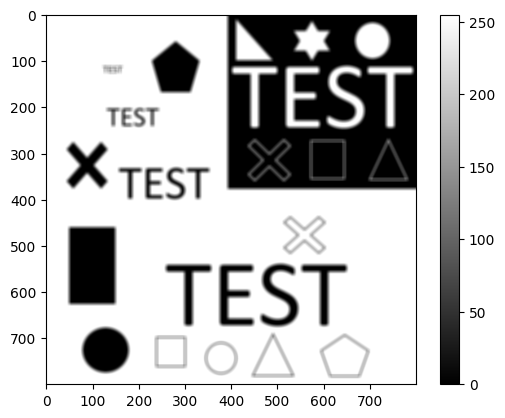

[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


In [52]:
import cv2
img = cv2.imread(dateiname)
gray = img[:,:,0]
gray_float = np.float64(gray)

import matplotlib.pyplot as plt
plt.imshow(gray_float, cmap="gray")
plt.colorbar()
plt.show()

import numpy as np
kernel = np.array([
                   [-1.0, 0.0, 1.0],
                   [-1.0, 0.0, 1.0],
                   [-1.0, 0.0, 1.0]
                  ])

kernel2 = np.array([
                   [-1.0, -1.0, -1.0],
                   [ 0.0,  0.0,  0.0],
                   [+1.0, +1.0, +1.0]
                  ])

s = 9
a = 1/s**2
kernel3 = np.ones((s,s)) * a

values = np.array([
                   [255, 0.0, 0.0],
                   [255, 0.0, 0.0],
                   [255, 0.0, 0.0]
                  ])

valuesq = np.array([
                   [0.0, 0.0, 255.0],
                   [0.0, 0.0, 255.0],
                   [0.0, 0.0, 255.0]
                  ])
                  
M = abs(cv2.filter2D(gray_float, -1, kernel3))

plt.imshow(M, cmap="gray")
plt.colorbar()
plt.savefig("featuremap.png")
plt.show()

print(kernel3)

In [39]:
M.flatten().max()

765.0

In [40]:
3*255

765

In [53]:
M.shape

(800, 800)